In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
x=pd.read_csv('Logistic_X_Train.csv').values
y=pd.read_csv('Logistic_Y_Train.csv').values
x_=pd.read_csv('Logistic_X_Test.csv').values

In [7]:
x_.shape

(1000, 3)

In [8]:
x.shape

(3000, 3)

In [9]:
u = x.mean(axis=0)
std = x.std(axis=0)

x= (x-u)/std

In [10]:
indices=np.ones((3000,1))


In [11]:
x=np.hstack((indices,x))

In [12]:
ones=np.ones((1000,1))

In [13]:
x_=np.hstack((ones,x_))

In [14]:
x.shape

(3000, 4)

/usr/lib/python3/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


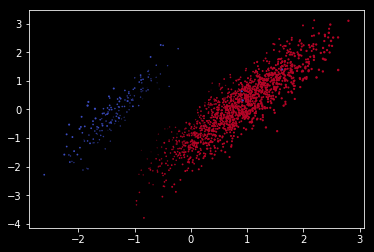

In [15]:
plt.style.use("dark_background")
plt.scatter(x[:,1],x[:,2],x[:,3],c=y[:,0],cmap=plt.cm.coolwarm_r)
plt.show()

In [16]:


def getypred(theta,x):
    return 1/(1.0 + np.exp(-(np.dot(x,theta))))

def predict(theta,x):
    y_pred = getypred(theta,x)
    result = np.zeros((y_pred.shape))
    result[y_pred>0.5]=1
    return result

def error(x,y,theta):
    y_ = getypred(theta,x)
    
    e=-(np.sum(y*np.log(y_)+(1-y)*np.log(1-y_)))
    m = x.shape[0]
    return e/m

def getGrad(x,y,theta):
    y_ = getypred(theta,x)
    grad = np.dot(x.T,(y_-y))
    return grad

In [17]:
def gradDescent(x,y,lr,maxItr):
    theta = np.zeros((x.shape[1],1))
    error_list = [ ]
    
    for i in range(maxItr): 
        grad = getGrad(x,y,theta)
        e = error(x,y,theta) 
        theta = theta - lr*grad
        error_list.append(e)
        
    return theta,error_list

In [28]:
theta,error_list=gradDescent(x,y,0.01,200)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


In [29]:
theta

array([[-1.469176],
       [-6.061759],
       [3.789973],
       [-2.879653]])

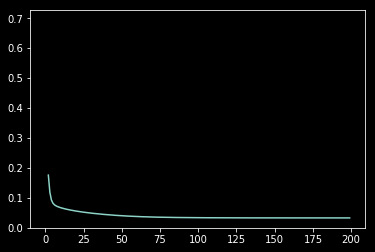

In [20]:
plt.plot(error_list)

/usr/lib/python3/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


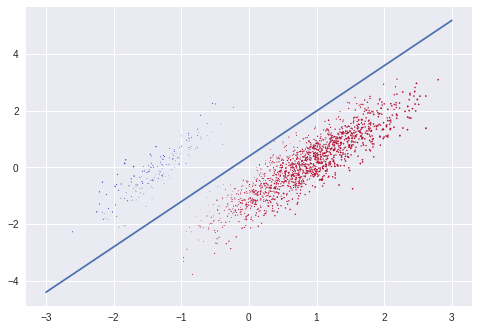

In [21]:
plt.style.use("seaborn")
plt.scatter(x[:,1],x[:,2],x[:,3],c=y[:,0],cmap=plt.cm.coolwarm_r)
x1 = np.linspace(-3,+3,5)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

In [22]:
result=predict(theta,x_)

In [23]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [24]:
result.shape

(1000, 1)